In [117]:
from scipy.stats import truncnorm
import pandas as pd
import numpy as np
import itertools
import datetime
import tqdm
import sys
import os

import matplotlib.pyplot as plt

def flatten_list(list_array):
    return list(itertools.chain(*list_array))

sys.path.insert(0, "../../pompjax/pompjax/")
sys.path.insert(0, "../..")
sys.path.insert(0, "../")

from global_config import config

results_dir          = config.get_property('results_dir')
results2_dir         = config.get_property('results2_dir')
data_dir             = config.get_property('data_dir')
paper_dir            = config.get_property('paper_dir')
data_db_dir          = config.get_property('data_db_dir')
data_cluster_dir     = config.get_property('data_cluster_dir')
results_cluster_dir  = config.get_property('results_cluster_dir')

feb_hosp_records_path = os.path.join(data_db_dir, 'long_files_8_25_2021')
path_to_save          = os.path.join(results_dir, "real_testing", "community")


In [118]:
from utils_local import plot_utils
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
import seaborn as sns

path_to_data = "/Users/chaosdonkey06/Dropbox/shaman-lab/amr-hospitals2/data"

observations_df  = pd.read_csv(os.path.join(path_to_data, "observations.csv"))
observations_df['date'] = pd.to_datetime(observations_df['date'])
observations_df = observations_df.set_index(['date', "amro"])
observations_df = observations_df[["y1",	"y2",	"y3",	"y4",	"y5",	"y6"]].sum(axis=1).unstack()



Text(0.5, -0.1, 'date')

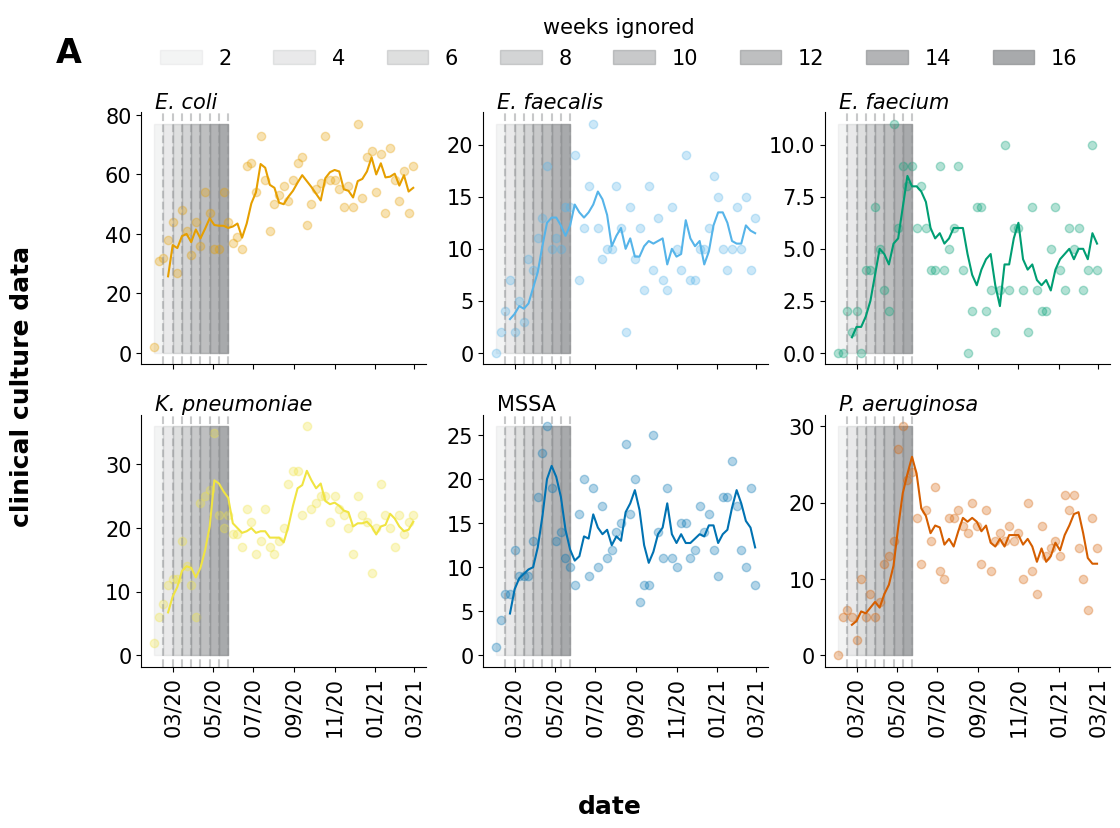

In [119]:
from utils_local.misc import amro2title, amro2cute
from matplotlib import dates as mdates

assim_dates  = list(pd.date_range(start=pd.to_datetime("2020-02-01"), end=pd.to_datetime("2021-02-28"), freq="W-Sun"))
ignore_dates = list(np.arange(0, 16+2, 2))

amro_search   = ["e_coli", "e_faecalis", "e_faecium", "k_pneumoniae", "mssa", "p_aeruginosa"]
palette_grays = ["#231D1F", "#939597"]

dates     = observations_df.index.values
obs_sm_df = observations_df.rolling(4).mean().stack().reset_index()

palette_guide = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, ax = plt.subplots(2, 3, figsize=(12.5, 7.2), sharex=True, sharey=False)

for i, axi in enumerate(ax.flatten()):

    amro = amro_search[i]


    for id in ignore_dates[1:]:

        x_dates = [assim_dates[id-2], assim_dates[id]]
        #if id in [2, 6, 8, 12, 16]:
        #    label=f"{id}"
        #else:
        #    label = None
        label=f"{id}"
        axi.fill_between(x_dates, 0, observations_df[[amro]].max().values[0],
                        color = palette_grays[1], alpha=0.05*id, label=label)
        axi.axvline(x=assim_dates[id], color=palette_grays[1], linestyle='--', alpha=0.5)

    axi.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
    axi.tick_params(which='both', axis='x', labelrotation=90)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.legend().remove()
    axi.set_ylabel(None)
    axi.set_xlabel(None)

    df = observations_df[[amro]].rolling(4).mean()
    axi.scatter(dates, observations_df[amro], alpha=0.3, color=palette_guide[i])
    axi.plot(dates, df, color=palette_guide[i])


    if amro=="mssa" or amro=="mrsa":
        style = "normal"
        amro_tit = "".join([a.capitalize() for a in amro])

    else:
        style = "italic"
        amro_tit = amro.split("_")
        amro_tit = amro.split("_")
        amro_tit = amro_tit[0].capitalize() +". "+amro_tit[1]


    axi.text(0.05, 1.08, amro_tit, transform=axi.transAxes, style=style,
                    verticalalignment='top', weight='normal')

ax[0, 0].legend(loc = 'upper left', title="weeks ignored", bbox_to_anchor=(0, 1.45), ncol=8, frameon = False)
ax[0, 0].text(s="A", x=-0.3, y=1.2 , transform=ax[0, 0].transAxes, fontsize=24, weight="bold")

fig.supylabel("clinical culture data", weight='bold')
fig.supxlabel("date", weight='bold', y=-0.1)


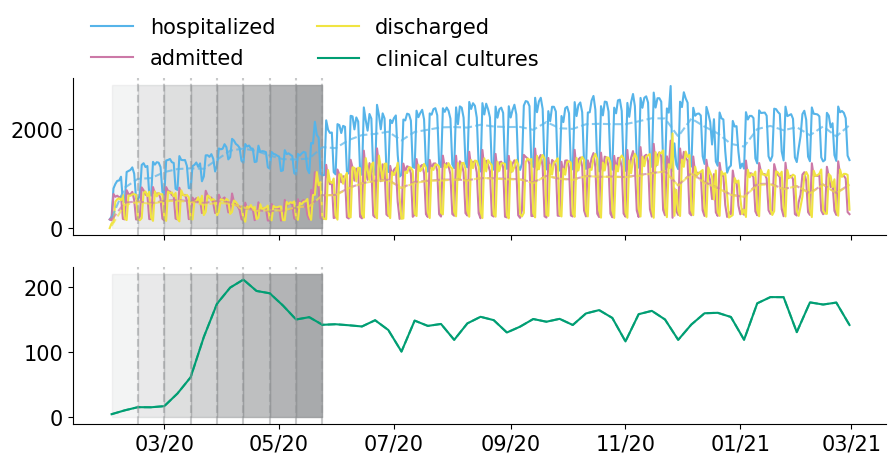

In [173]:
path_to_ward_counts = os.path.join("/Users/chaosdonkey06/Dropbox/shaman-lab/amr-hospitals2/data", "counts_ward.csv" )

hosp_df = pd.read_csv(path_to_ward_counts, parse_dates=["date"]).drop(columns=["ward"]).groupby(["date"]).sum()

fig, ax = plt.subplots(2, 1, figsize=(10.5, 4.5), sharex=True, sharey=False)

ax[0].plot(hosp_df.index, hosp_df["num_hospitalized"], color=palette_guide[1], label="hospitalized")
ax[0].plot(hosp_df.index, hosp_df["num_admitted"],     color=palette_guide[6], label="admitted")
ax[0].plot(hosp_df.index, hosp_df["num_discharged"],   color=palette_guide[3], label="discharged")

hosp_df = hosp_df.resample("W-Sun").mean()
ax[0].plot(hosp_df.index, hosp_df["num_hospitalized"], color=palette_guide[1], alpha=0.7, ls="--")
ax[0].plot(hosp_df.index, hosp_df["num_admitted"],     color=palette_guide[6], alpha=0.7, ls="--")
ax[0].plot(hosp_df.index, hosp_df["num_discharged"],   color=palette_guide[3], alpha=0.7, ls="--")

###
ax[1].plot(hosp_df.index, hosp_df["num_tested"], color=palette_guide[-5], label="clinical cultures")
hosp_df = hosp_df.resample("W-Sun").mean()
ax[1].plot(hosp_df.index, hosp_df["num_tested"], color=palette_guide[-5], alpha=0.7, ls="--")

for id in ignore_dates[1:]:
    x_dates = [assim_dates[id-2], assim_dates[id]]
    #if id in [2, 6, 8, 12, 16]:
    #    label=f"{id}"
    #else:
    #    label = None
    label=f"{id}"
    ax[0].fill_between(x_dates, 0, 2900,
                        color = palette_grays[1], alpha=0.05*id)
    ax[0].axvline(x=assim_dates[id], color=palette_grays[1], linestyle='--', alpha=0.5)

    ax[1].fill_between(x_dates, 0, 220,
                        color = palette_grays[1], alpha=0.05*id)
    ax[1].axvline(x=assim_dates[id], color=palette_grays[1], linestyle='--', alpha=0.5)

for axi in ax:
    axi.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
    axi.tick_params(which='both', axis='x', labelrotation=0)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.legend(loc="upper left", frameon=False, ncol=2, bbox_to_anchor=(0, 1.5))
    axi.set_ylabel(None)
    axi.set_xlabel(None)
ax[1].legend(loc="upper left", frameon=False, ncol=1, bbox_to_anchor=(0.278, 2.5))

In [121]:
assim_dates = list(pd.date_range(start=pd.to_datetime("2020-02-01"), end=pd.to_datetime("2021-02-28"), freq="W-Sun"))
print("total assimilated weeks: {}".format(len(assim_dates)))

ignore_dates = list(np.arange(0, 16+2, 2))

total assimilated weeks: 57


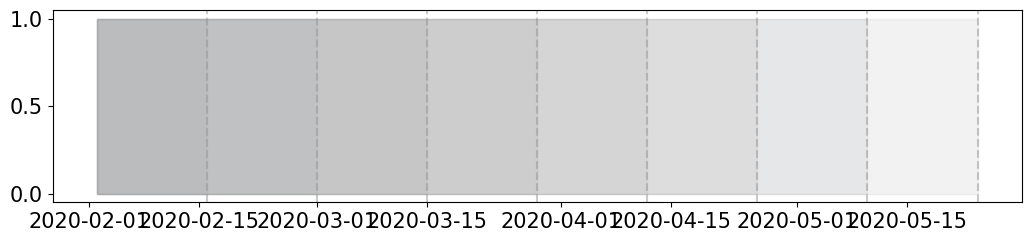

In [122]:

fig, ax = plt.subplots(1, 1, figsize=(12.5, 2.5), sharex=True, sharey=False)

for id in ignore_dates[1:]:

    x_dates = [assim_dates[0], assim_dates[id]]
    ax.fill_between(x_dates, 0, 1,
                    color = palette_grays[1], alpha=0.1 + 0.001*id)
    ax.axvline(x=assim_dates[id], color=palette_grays[1], linestyle='--', alpha=0.5)

In [123]:
dates_ignored = [assim_dates[id] for id in ignore_dates]
dates_ignored

ax.fill_between(respiration, respiration*0,
                   np.max(Jac_wt(λ))*np.ones_like(respiration),
                   label="respiration",
                   color=palette_grays[1], alpha=0.3)

NameError: name 'respiration' is not defined